In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Define the dataset
data = {
    'boot_size': [39, 38, 37, 39, 38, 35, 37, 36, 35, 40,
                  40, 36, 38, 39, 42, 42, 36, 36, 35, 41,
                  42, 38, 37, 35, 40, 36, 35, 39, 41, 37,
                  35, 41, 39, 41, 42, 42, 36, 37, 37, 39,
                  42, 35, 36, 41, 41, 41, 39, 39, 35, 39],
    'harness_size': [58, 58, 52, 58, 57, 52, 55, 53, 49, 54,
                     59, 56, 53, 58, 57, 58, 56, 51, 50, 59,
                     59, 59, 55, 50, 55, 52, 53, 54, 61, 56,
                     55, 60, 57, 56, 61, 58, 53, 57, 57, 55,
                     60, 51, 52, 56, 55, 57, 58, 57, 51, 59]
}


In [3]:

# Convert to a DataFrame
dataset = pd.DataFrame(data)

# Print the first few rows
print("Dataset:")
print(dataset.head())

Dataset:
   boot_size  harness_size
0         39            58
1         38            58
2         37            52
3         39            58
4         38            57


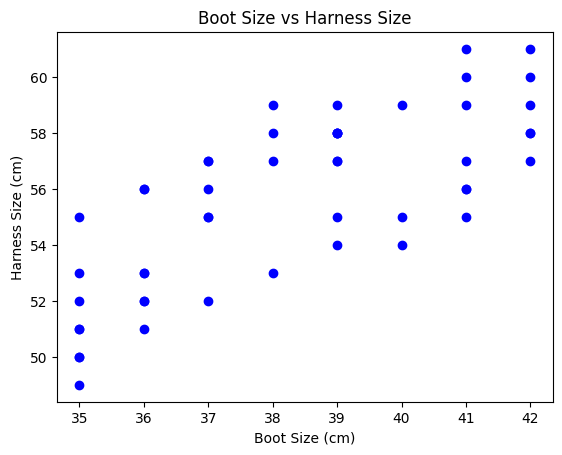

In [4]:
# Visualize the data
plt.scatter(dataset['boot_size'], dataset['harness_size'], color='blue')
plt.title('Boot Size vs Harness Size')
plt.xlabel('Boot Size (cm)')
plt.ylabel('Harness Size (cm)')
plt.show()

In [5]:

# Split into features (X) and target (y)
X = dataset[['boot_size']]  # Features (must be 2D for scikit-learn)
y = dataset['harness_size']  # Target (1D)

In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Create and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Print model parameters
print(f"Model Parameters:")
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

Model Parameters:
Intercept: 18.925000000000004
Coefficient: 0.9590909090909091


In [9]:

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluation Metrics:")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Evaluation Metrics:
Mean Squared Error: 2.4023688016528952
R² Score: 0.6904163915395753


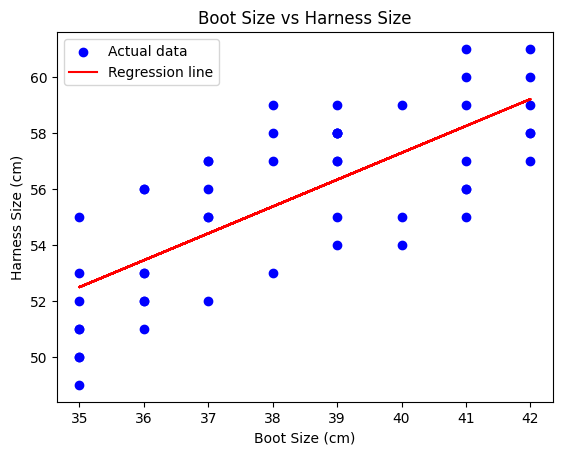

In [10]:
# Visualize the regression line
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, model.predict(X), color='red', label='Regression line')
plt.title('Boot Size vs Harness Size')
plt.xlabel('Boot Size (cm)')
plt.ylabel('Harness Size (cm)')
plt.legend()
plt.show()


In [11]:
# Use the model for prediction
new_boot_size = [[40]]  # Example: Predict for boot size 40
predicted_harness_size = model.predict(new_boot_size)
print(f"\nPredicted Harness Size for Boot Size 40: {predicted_harness_size[0]}")


Predicted Harness Size for Boot Size 40: 57.28863636363637


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [12]:
# Optional: Detailed stats with statsmodels
import statsmodels.api as sm
X_sm = sm.add_constant(X)  # Add intercept
model_sm = sm.OLS(y, X_sm).fit()
print("\nStatsmodels Summary:")
print(model_sm.summary())


Statsmodels Summary:
                            OLS Regression Results                            
Dep. Variable:           harness_size   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     63.37
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           2.53e-10
Time:                        04:57:16   Log-Likelihood:                -105.68
No. Observations:                  50   AIC:                             215.4
Df Residuals:                      48   BIC:                             219.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.4278      4.6